In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, cophenet
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(dataset.shape)

(200, 5)


In [4]:
print(dataset.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [5]:
print(dataset.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
dataset = dataset.dropna()

In [7]:
print(dataset.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [8]:
print(dataset.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [9]:
print(dataset.shape)

(200, 5)


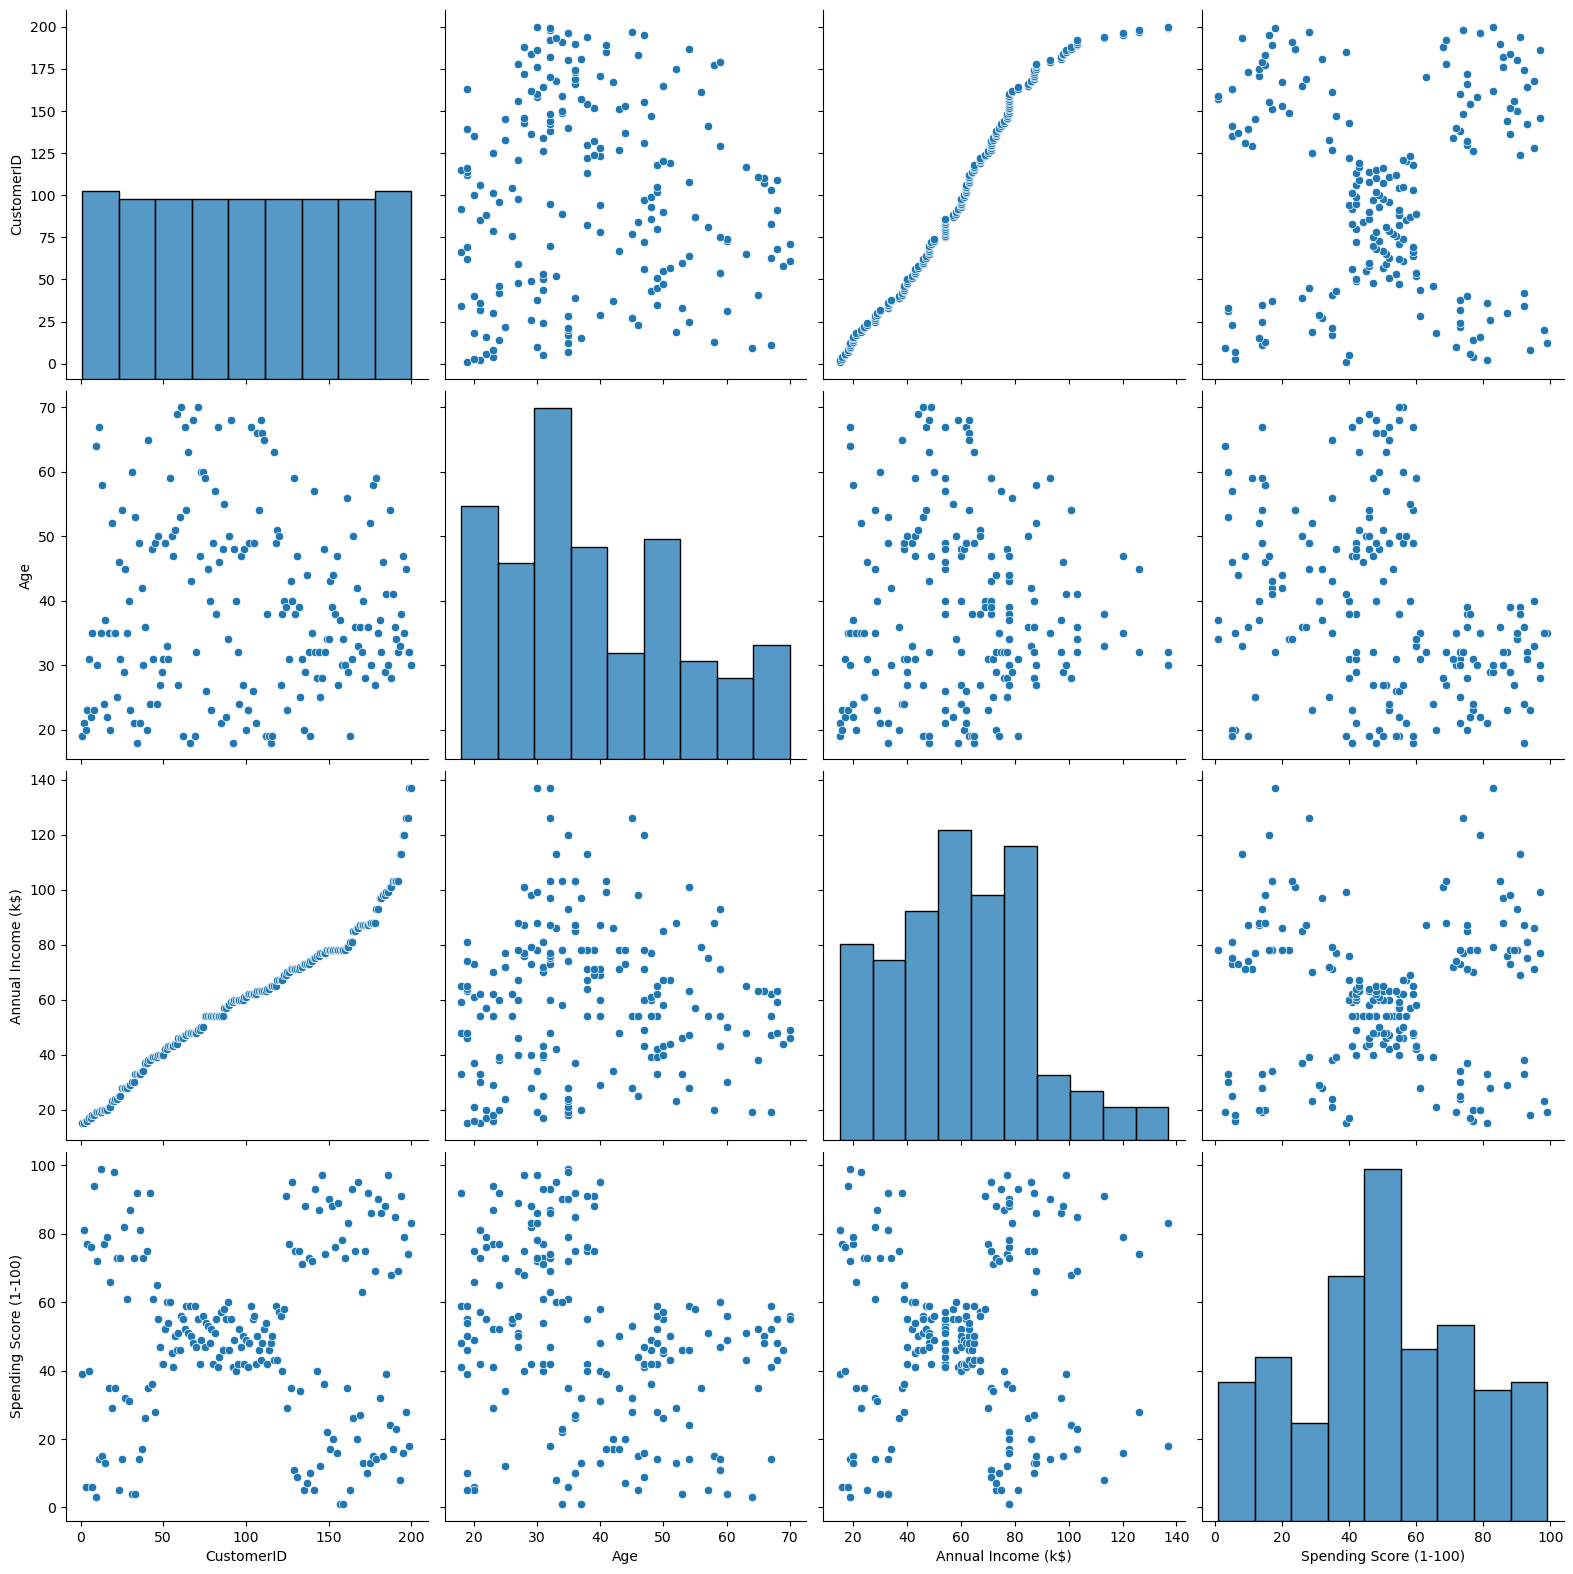

In [10]:
sns.pairplot(dataset, size=4, kind='scatter')
plt.show()

In [11]:
dataset = dataset.drop(columns=['Gender'])
print(dataset.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
0           1   19                  15                      39
1           2   21                  15                      81
2           3   20                  16                       6
3           4   23                  16                      77
4           5   31                  17                      40


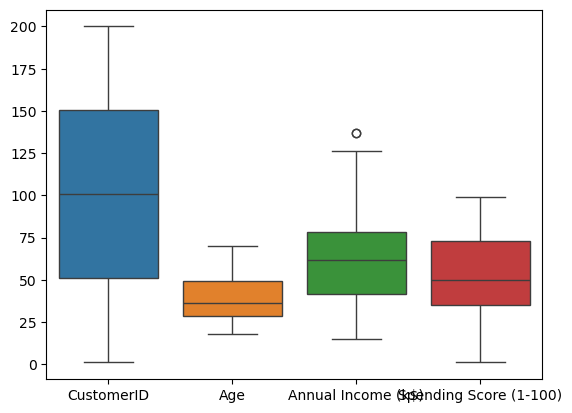

In [12]:
sns.boxplot(data=dataset)
plt.show()

In [13]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
print(x.head())

   CustomerID       Age  Annual Income (k$)  Spending Score (1-100)
0   -1.723412 -1.424569           -1.738999               -0.434801
1   -1.706091 -1.281035           -1.738999                1.195704
2   -1.688771 -1.352802           -1.700830               -1.715913
3   -1.671450 -1.137502           -1.700830                1.040418
4   -1.654129 -0.563369           -1.662660               -0.395980


##K-MEANS

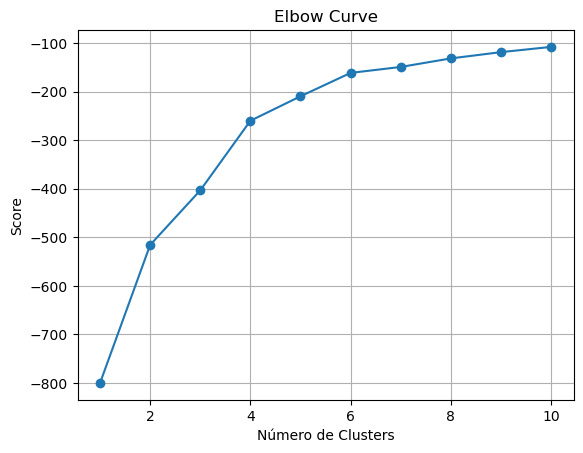

In [14]:
Nc = range(1, 11)
kmeans = [KMeans(n_clusters=i)for i in Nc]
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
plt.plot(Nc, score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.grid()
plt.show()

In [15]:
kmeans = KMeans(n_clusters=4).fit(x)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.87036641 -0.90904474 -0.83756451  0.28792658]
 [-0.52769496  1.16024842 -0.46970394 -0.31965278]
 [ 1.02668595  0.10226753  0.96816757 -1.18211652]
 [ 1.03142803 -0.43908961  0.95706585  1.1919166 ]]


In [16]:
labels = kmeans.labels_
C = kmeans.cluster_centers_
colores = ['red', 'green', 'cyan', 'blue']
asignar = []

for row in labels:
    asignar.append(colores[row])

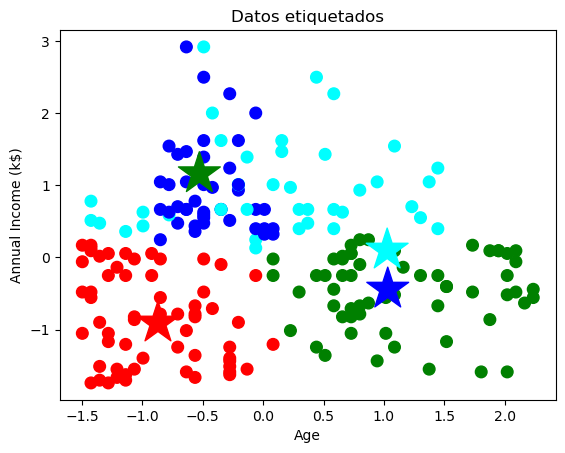

In [17]:
### Graficar Age vs Annual Income
f1 = x['Age'].values
f2 = x['Annual Income (k$)'].values
plt.scatter(f1, f2,  c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

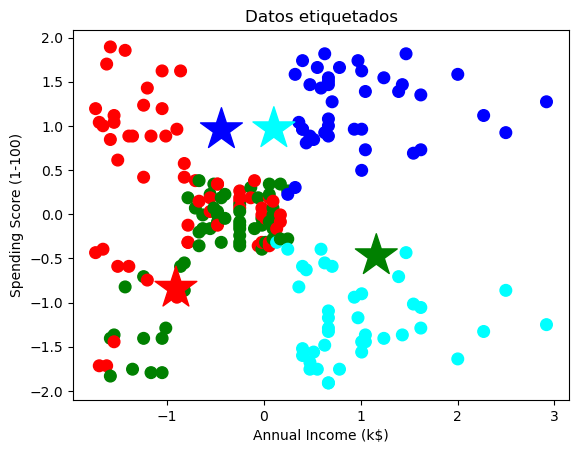

In [18]:
f1 = x['Annual Income (k$)'].values
f2 = x['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

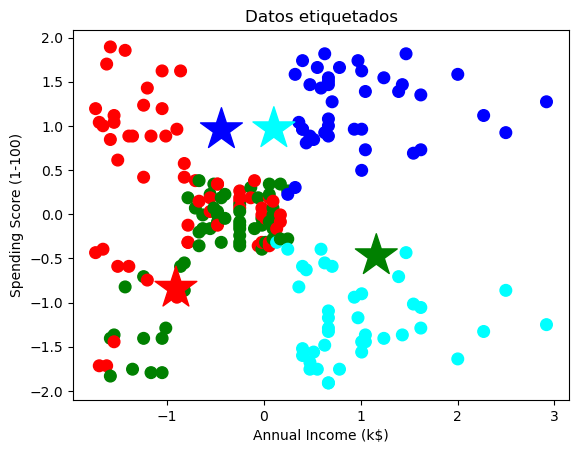

In [19]:
f1 = x['Annual Income (k$)'].values
f2 = x['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [20]:
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(x, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(x, labels))
print("Inercia (suma de cuadrados dentro de los Clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(x, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.41358360614845524
Índice de Calinski-Harabasz: 135.9199278402295
Inercia (suma de cuadrados dentro de los Clusters): 259.7059364995401
Davies-Bouldin Index: 0.9075610618485941


In [21]:
kmeans = KMeans(n_clusters=5).fit(x)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.78176424 -0.99120839 -0.74439195  0.48870372]
 [ 1.04745972  0.10645392  0.98962564 -1.20426472]
 [-0.30569236  1.17735545 -0.24795511 -0.04658587]
 [-1.33905697  0.47895722 -1.30822992 -1.19644353]
 [ 1.03142803 -0.43908961  0.95706585  1.1919166 ]]


In [22]:
labels = kmeans.labels_
C = kmeans.cluster_centers_
colores = ['red', 'green', 'cyan', 'blue', 'yellow']
asignar = []

for row in labels:
    asignar.append(colores[row])

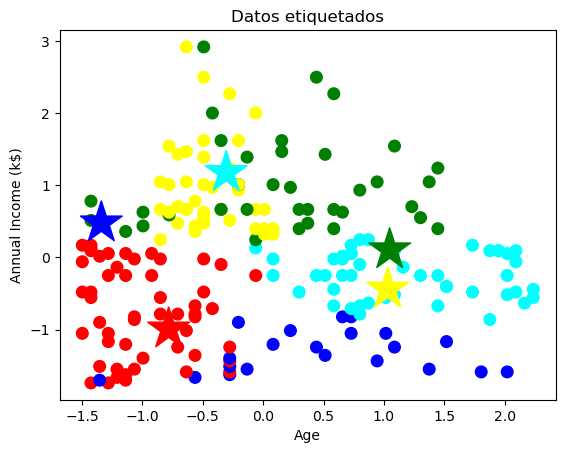

In [23]:
### Graficar Age vs Annual Income
f1 = x['Age'].values
f2 = x['Annual Income (k$)'].values
plt.scatter(f1, f2,  c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

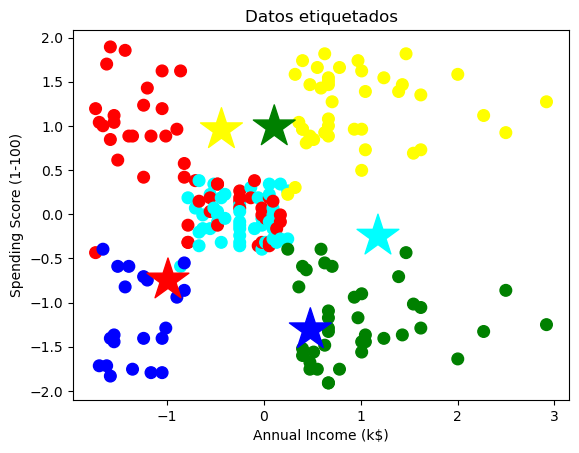

In [24]:
f1 = x['Annual Income (k$)'].values
f2 = x['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

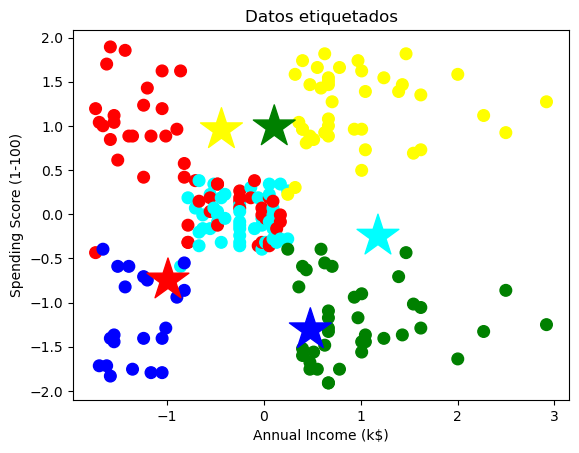

In [25]:
f1 = x['Annual Income (k$)'].values
f2 = x['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [26]:
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(x, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(x, labels))
print("Inercia (suma de cuadrados dentro de los Clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(x, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.4272395443393026
Índice de Calinski-Harabasz: 137.3378936961741
Inercia (suma de cuadrados dentro de los Clusters): 209.57838376995835
Davies-Bouldin Index: 0.8262907930832973


In [27]:
x_new = scaler.transform(np.array([[201, 35, 70, 80]]))
new_label = kmeans.predict(x_new)
color = []
for label in new_label:
    color.append(colores[label])
print(new_label)
print(color)

[4]
['yellow']


In [28]:
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(x, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(x, labels))
print("Inercia (suma de cuadrados dentro de los Clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(x, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.4272395443393026
Índice de Calinski-Harabasz: 137.3378936961741
Inercia (suma de cuadrados dentro de los Clusters): 209.57838376995835
Davies-Bouldin Index: 0.8262907930832973


###hierarchical clustering

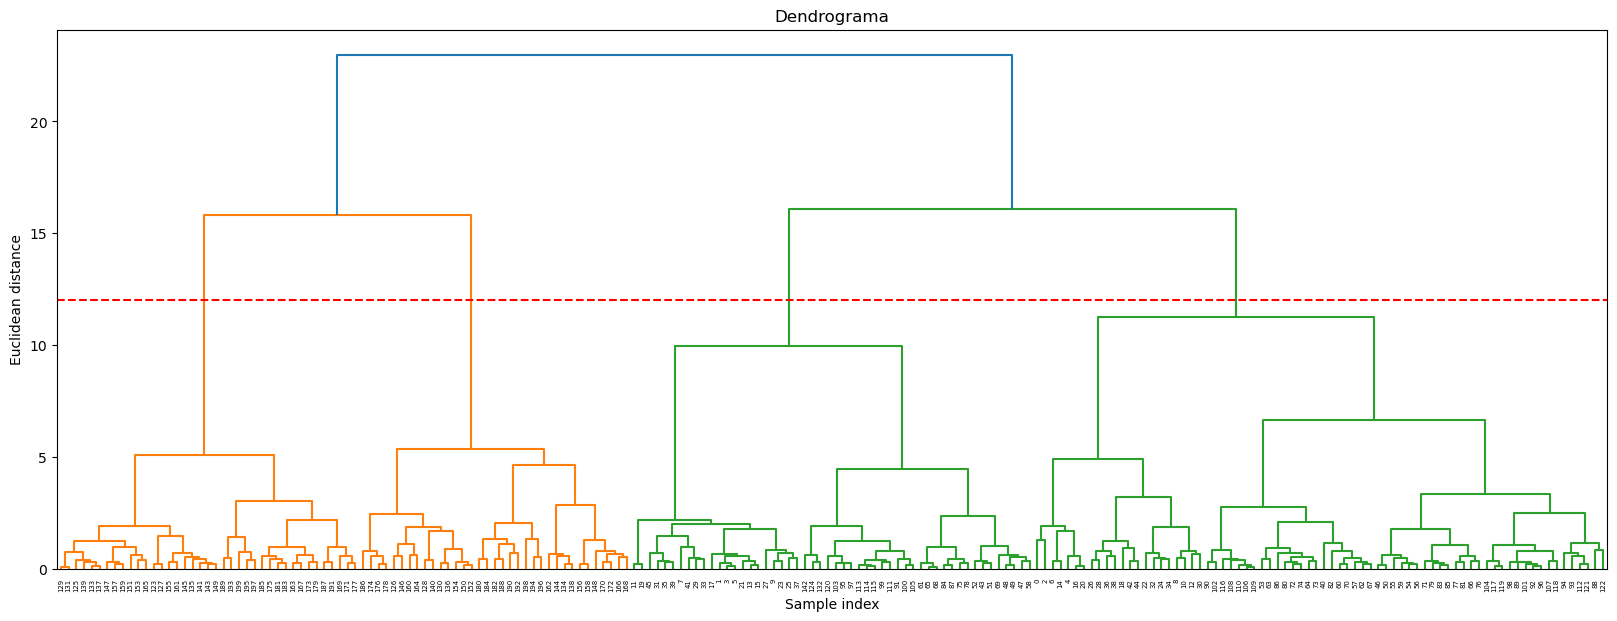

In [31]:
ward_clustering = linkage(x, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y=12, color='r', linestyle='--')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [33]:
hier_clustering = AgglomerativeClustering(n_clusters=4)
labels_hier = hier_clustering.fit_predict(x)
labels_hier

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int64)

In [34]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores = ['red', 'green', 'cyan', 'blue'] 
asignar = []

for row in labels:
    asignar.append(colores[row])

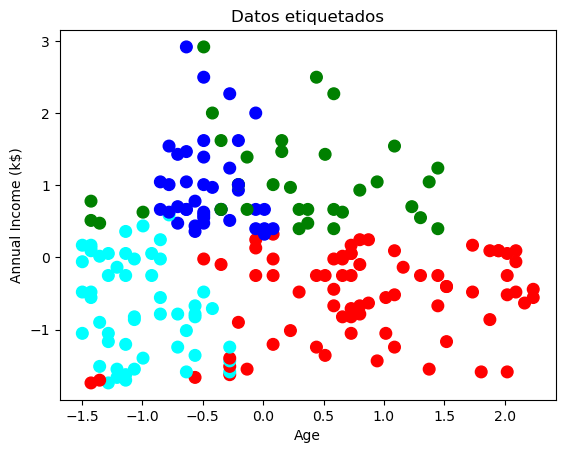

In [35]:
f1 = x['Age'].values
f2 = x['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

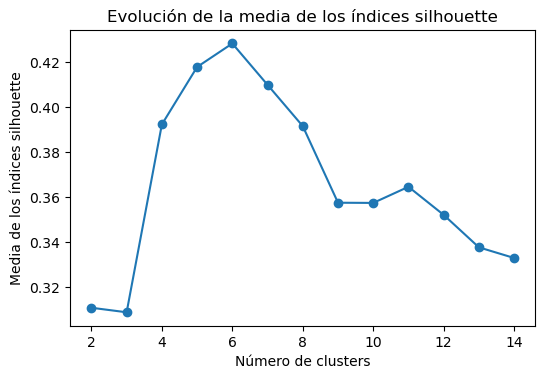

In [51]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
        linkage='ward',
        n_clusters=n_clusters
    )
    cluster_labels = modelo.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de la media de los índices silhouette")
ax.set_xlabel('Número de clusters')
ax.set_ylabel('Media de los índices silhouette')
plt.show()

In [54]:
print("Medidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(x, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(x, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(x, labels_hier))
 

Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.39231254266034143
Índice de Calinski-Harabasz: 119.44498361793892
Davies-Bouldin Index: 0.9713829128749328


In [55]:
hier_clustering = AgglomerativeClustering(n_clusters=2)
labels_hier = hier_clustering.fit_predict(x)
labels_hier

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [56]:
print("Medidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(x, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(x, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(x, labels_hier))

Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.3107636523419464
Índice de Calinski-Harabasz: 97.24151239320494
Davies-Bouldin Index: 1.3111098806113213


In [62]:

# Calcular las distancias
x_dist = pdist(x)
# Calcular la matriz de enlace
Z = linkage(x, 'ward')
# Calcular el coeficiente de correlación cofenético
coef_cofenético, _ = cophenet(Z, x_dist)
# Imprimir el resultado
print("Coeficiente de correlación cofenético:", coef_cofenético)

Coeficiente de correlación cofenético: 0.644982688580315
